In [14]:

import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras import backend as K
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

def generate_report(y_actual, y_pred):
    print('mse',round(mean_squared_error(y_actual, y_pred),3))
    print('RMSE', round(sqrt(mean_squared_error(y_actual, y_pred)),3))
    print('R2', round(r2_score(y_actual, y_pred),3))
    print('error', np.mean(pd.DataFrame(y_train) - pd.DataFrame(y_pred))[0])

def generate_loss_plot(history, filename=None):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('loss curve')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    if (filename!=None):
        plt.savefig(filename)
    plt.show()

def generate_hist_plot(y_actual, y_pred, filename=None):
    y = pd.DataFrame(y_actual)
    y['new']=y.index
    pred = pd.DataFrame(y_pred)
    pred.index=y['new'].values
    y = y.drop('new',axis=1)
    pred = pred.rename(columns={0:'predicted'})
    x =pd.DataFrame(y[0]-pred['predicted'])
    x = x.rename(columns={0:'difference'})
    done = pd.concat([x,y,pred],axis=1)
    p = x['difference'].values
    type(p)
    plt.hist(p, bins='auto', range=(-75000, 75000))
    if (filename!=None):
        plt.savefig(filename)
    plt.show()


def get_data(): 
    df = pd.read_csv('pluto5_stddum.csv')
    df.drop(['assessland'], axis=1, inplace=True)
    
    X = df[df.columns]
    X.drop('assesstot', axis=1, inplace=True)
    predictors = X.columns
    X = X.values
    Y = df['assesstot'].values
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    return x_train, x_test, y_train, y_test, predictors

#3)Adam combines the good properties of Adadelta and RMSprop and hence tend to do better for most of the problems.
def fit_model(model, x_train, x_test, y_train, y_test, epochs):
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    history = model.fit(x_train, y_train, epochs=epochs, verbose=0, validation_data=(x_test, y_test))
    generate_loss_plot(history, filename=None)
    return model

def predict(model, x_train, y_train, x_test, y_test, filename=None):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    fig, ax = plt.subplots()
    ax.plot(y_test, color = 'blue')
    ax.plot(y_test_pred, color = 'red')
    ax.legend(['Real', 'Predicted'])
    if (filename!=None):
        fig.savefig(filename)
    plt.show()
    print('ERROR Training')
    generate_report(y_train, y_train_pred)
    print('ERROR Test')
    generate_report(y_test, y_test_pred)
    print('Histogram Training')
    generate_hist_plot(y_train, y_train_pred)
    print('Histogram Test')
    generate_hist_plot(y_test, y_test_pred)
    return y_train_pred, y_test_pred
    
def run_model(hidden_nodes, x_train, x_test, y_train, y_test, epochs):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(input_nodes, tf.keras.activations.linear))
    model.add(tf.keras.layers.Dense(hidden_nodes, tf.keras.activations.relu))
    model.add(tf.keras.layers.Dense(1, tf.keras.activations.linear))
    model = fit_model(model, x_train, x_test, y_train, y_test, epochs)
    return predict(model, x_train, y_train, x_test, y_test, filename=None)


In [8]:
x_train, x_test, y_train, y_test, predictors = get_data()
input_nodes = len(predictors)
epochs = 20

Model 0


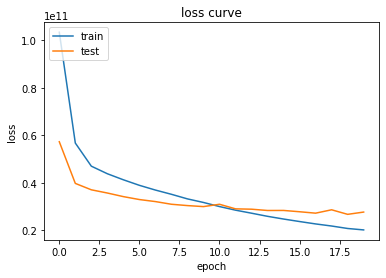

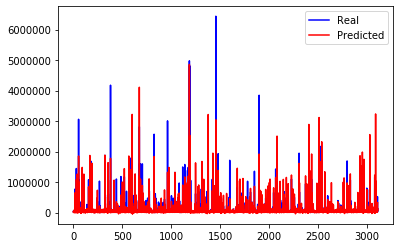

ERROR Training
mse 19037445880.549
RMSE 137976.251
R2 0.831
error 757.26624
ERROR Test
mse 27718105429.758
RMSE 166487.553
R2 0.705
error -6711.707
Histogram Training


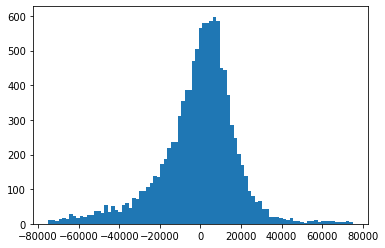

Histogram Test


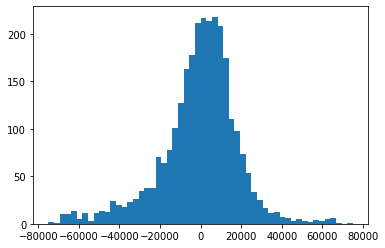

In [15]:
#choose the amount of nodes in hidden layers: http://www.faqs.org/faqs/ai-faq/neural-nets/part3/section-10.html
#NN0: 1 hidden layer with (Number of inputs + outputs) * (2/3) nodes: overfitting
#does not predicts well high values but it might be because sample 
print('Model 0')
y_train_pred, y_test_pred = run_model(int((input_nodes+1)*(2/3)), x_train, x_test, y_train, y_test, epochs)

Model 1


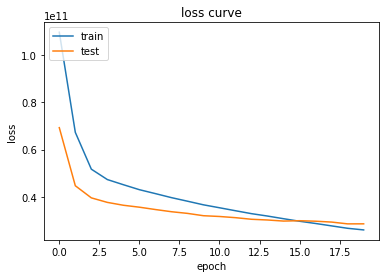

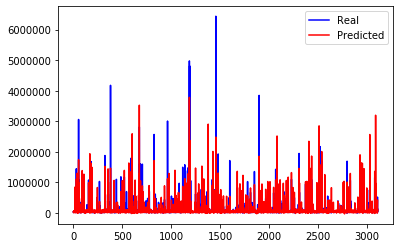

ERROR Training
mse 24975005818.626
RMSE 158034.825
R2 0.779
error -1457.1775
ERROR Test
mse 28612149799.929
RMSE 169151.263
R2 0.696
error -7834.5044
Histogram Training


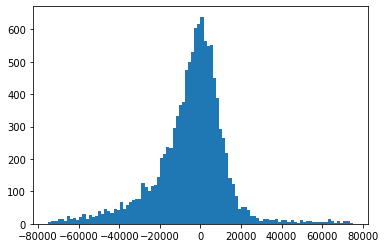

Histogram Test


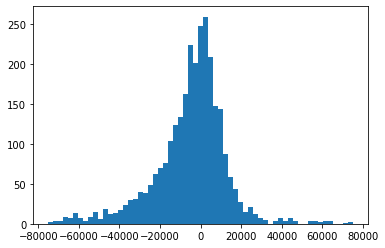

In [16]:
#NN1: # A typical recommendation is that
#the number of weights should be no more than 1/30 of the number of training cases: underfitting
print('Model 1')
y_train_pred, y_test_pred = run_model(int(len(x_train)/(30*2)), x_train, x_test, y_train, y_test, epochs)

Model 2


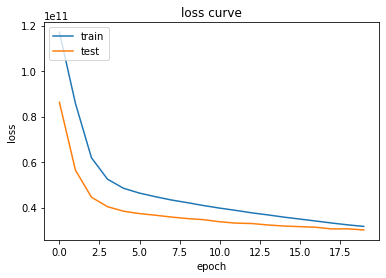

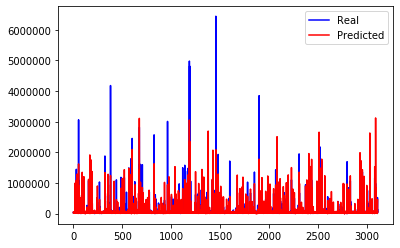

ERROR Training
mse 30926563260.052
RMSE 175859.499
R2 0.726
error -1098.0812
ERROR Test
mse 30189593040.145
RMSE 173751.527
R2 0.679
error -6979.376
Histogram Training


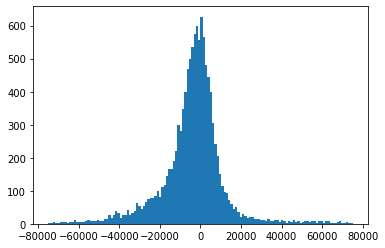

Histogram Test


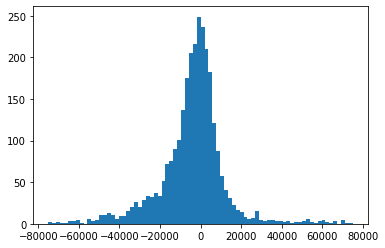

In [17]:
#NN2: reduce amount of nodes hidden layer: underfitting
print('Model 2')
y_train_pred, y_test_pred = run_model(int(len(x_train)/(30*4)), x_train, x_test, y_train, y_test, epochs)

Model 3


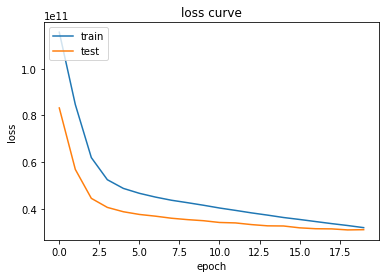

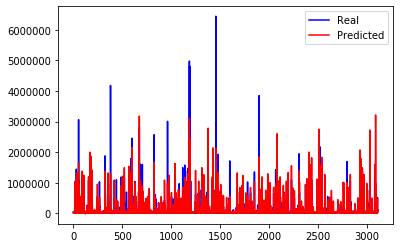

ERROR Training
mse 31328190978.204
RMSE 176997.715
R2 0.723
error -3321.0352
ERROR Test
mse 31018449261.199
RMSE 176120.553
R2 0.67
error -9441.581
Histogram Training


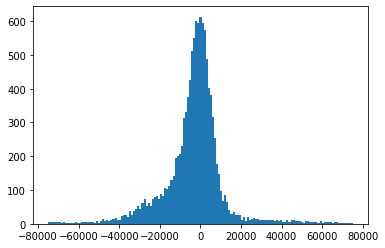

Histogram Test


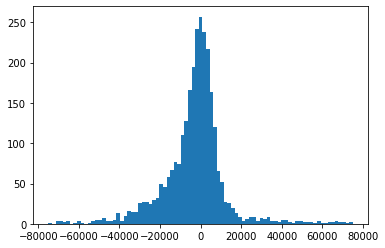

In [18]:
#NN3: reduce amount of nodes hidden layer: underfitting
print('Model 3')
y_train_pred, y_test_pred = run_model(int(len(x_train)/(30*6)), x_train, x_test, y_train, y_test, epochs)

Model 4


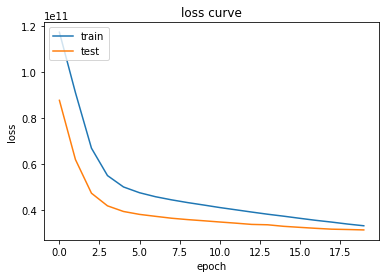

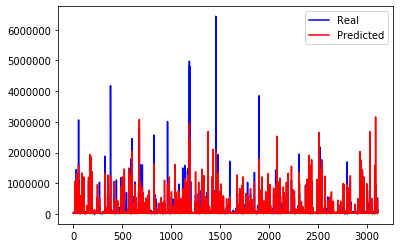

ERROR Training
mse 32516302684.38
RMSE 180322.774
R2 0.712
error -291.0018
ERROR Test
mse 31429211676.594
RMSE 177282.858
R2 0.666
error -6291.261
Histogram Training


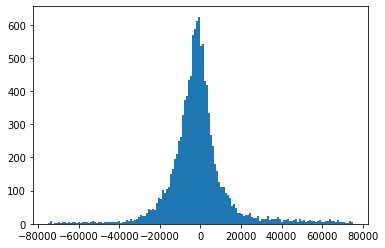

Histogram Test


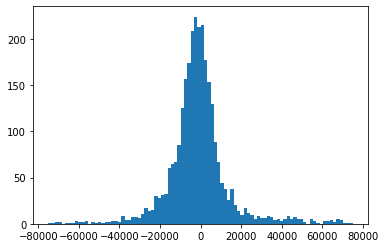

In [19]:
#NN4: reduce amount of nodes hidden layer: underfitting
print('Model 4')
y_train_pred, y_test_pred = run_model(int(len(x_train)/(30*8)), x_train, x_test, y_train, y_test, epochs)

Model 5


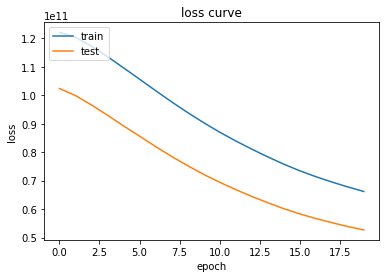

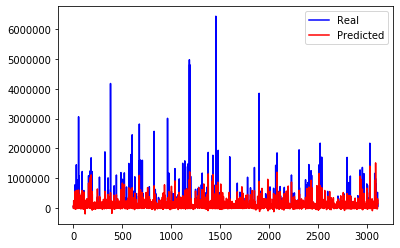

ERROR Training
mse 65430375840.142
RMSE 255793.62
R2 0.421
error 3505.302
ERROR Test
mse 52696148385.723
RMSE 229556.417
R2 0.439
error -1226.4713
Histogram Training


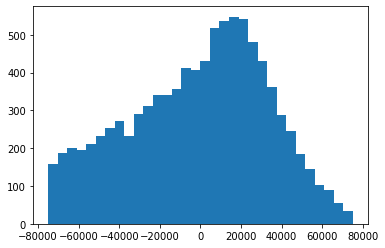

Histogram Test


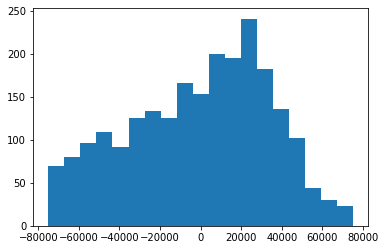

(array([[131847.17 ],
        [136435.14 ],
        [ 26183.842],
        ...,
        [ 62217.83 ],
        [ -9652.773],
        [103285.59 ]], dtype=float32), array([[ 61085.113],
        [-22045.479],
        [-14312.077],
        ...,
        [274759.38 ],
        [121062.   ],
        [297135.7  ]], dtype=float32))

In [22]:
#NN5: without hidden layer
print('Model 5')
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(input_nodes, tf.keras.activations.linear))
model.add(tf.keras.layers.Dense(1, tf.keras.activations.linear))
model = fit_model(model, x_train, x_test, y_train, y_test, epochs)
predict(model, x_train, y_train, x_test, y_test, filename=None)

In [ ]:
#TODO: read optimizer
#https://medium.com/datadriveninvestor/overview-of-different-optimizers-for-neural-networks-e0ed119440c3
